# Synapse Task 2

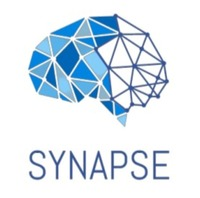

### Run the following cell to import the required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Welcome to the second task on your road to being a part of the Synapse fam. This task will be focusing on the first step of beginning any ML or Data Science project which Data Preprocessing. One may ask why do we need to clean data? Imagine you are trying to make some food,you need to clean the vegetables, cut them, dice them, season them right? Any end product needs preprocessing and that is what we will be exploring in this task.

Now, use this link to download the dataset and upload it to your kaggle notebook on the input window on the right side.
https://drive.google.com/file/d/1d4Yq5AlqFkkNAsOeI2HO9jQ41EOp4qmJ/view?usp=sharing

Save it under the same name as the file name if the name doesn't match one in the code given below, change the path as '/kaggle/input/folder_name/file_name.csv'

We will be using this dataset to carry out basic pandas and matplotlib commands.


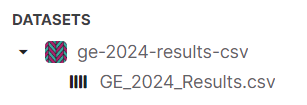use this image as reference

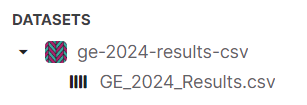

### To make your dataframe run this cell

In [2]:
df = pd.read_csv('/kaggle/input/d/pranavahuja2005/ge-2024-results-csv/GE_2024_Results.csv')


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/d/pranavahuja2005/ge-2024-results-csv/GE_2024_Results.csv'

This is a tabular dataset consisting of the results of Indian General Elections 2024. As you can see when you print the dataframe you can see its size at the bottom.

There is another way to find out the dimensions of a dataframe. Enter the code to find that out in the following cell.

In [ ]:
df = pd.read_csv(r"/kaggle/input/d/pranavahuja2005/ge-2024-results-csv/GE_2024_Results.csv")
dimensions = df.shape
rows = dimensions[0]
columns = dimensions[1]
print("Initial Dimensions: -")
print(rows, columns)

Initial Dimensions: -
8906 10


Write the code to display the first 20 rows of the dataframe.

In [ ]:
print("First 20 rows: -")
print(df.iloc[0:20])

First 20 rows: -
    ID                      State               Constituency  \
0    1  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
1    2  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
2    3  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
3    4  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
4    4  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
5    5  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
6    6  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
7    7  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
8    8  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
9    4  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
10   9  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
11  10  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
12  11  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
13  12  Andaman & Nicobar Islands  Andaman & Nicobar Islands   
14  13  Andaman & Nicob

You can see that we already have one column for indices and we dont need an extra to create consfusion. Write a code to remove the ID column.

In [ ]:
df = df.drop(columns=["ID"])
dimensions = df.shape
rows = dimensions[0]
columns = dimensions[1]

You can see some NaN values in the dataframe, these are something that will cause errors later and we don't want that. Write a code to remove these values from our dataframe. Additionally you'll see that the index values are not in order. Take care of that as well :)

In [ ]:
# i = 1
# while i < rows:
#     if pd.isna(df.iloc[i]["EVM Votes"]):
#         df = df.drop(index=i)
#         df = df.reset_index(drop=True)
#         rows -= 1
#     else:
#         i += 1
df.drop(df[df["EVM Votes"].isna()].index,inplace=True)


dimensions = df.shape
rows = dimensions[0]
columns = dimensions[1]
print("Dimensions after cleaning: -")
print(rows, columns)

Dimensions after cleaning: -
8902 9


If all is correct your dataframe should have 8902 rows and 9 columns.

### The previous commands were just to make sure we have a workable dataframe now, we'll do some manipulations on the data.

Find out the top 5 most voted candidates in Telangana

In [ ]:
tela=df[df.State=="Telangana"][["Candidate","Total Votes"]]
tela=tela.sort_values(by="Total Votes",ascending=False).reset_index()
print(tela.head())

   index                   Candidate  Total Votes
0   7052             EATALA RAJENDER     991042.0
1   6856     KONDA VISHWESHWAR REDDY     809882.0
2   7140           KUNDURU RAGHUVEER     784337.0
3   6960  RAMASAHAYAM RAGHURAM REDDY     766929.0
4   6900            ASADUDDIN OWAISI     661981.0


Find out the total number of votes received by each state

In [ ]:

state_votes = df.groupby('State')['Total Votes'].sum().sort_values(ascending=False)
print(state_votes)

State
Uttar Pradesh                           87911642.0
West Bengal                             60483687.0
Maharashtra                             57179133.0
Tamil Nadu                              43674048.0
Bihar                                   43448949.0
Karnataka                               38793617.0
Madhya Pradesh                          37940251.0
Andhra Pradesh                          33729342.0
Rajasthan                               33164877.0
Gujarat                                 29115599.0
Odisha                                  25129026.0
Telangana                               22008373.0
Assam                                   20059870.0
Kerala                                  19980436.0
Jharkhand                               17241982.0
Chhattisgarh                            15061348.0
Punjab                                  13530923.0
Haryana                                 13055572.0
NCT OF Delhi                             8938049.0
Jammu and Kashmir        

Show these values as a percentage of the total number of votes received in the election.

In [ ]:

total_votes=df["Total Votes"].sum()
statesp=state_votes.map(lambda p: p*100/total_votes).sort_values(ascending=False)
print(statesp)

State
Uttar Pradesh                           13.622036
West Bengal                              9.372035
Maharashtra                              8.859989
Tamil Nadu                               6.767357
Bihar                                    6.732478
Karnataka                                6.011127
Madhya Pradesh                           5.878897
Andhra Pradesh                           5.226410
Rajasthan                                5.138946
Gujarat                                  4.511504
Odisha                                   3.893779
Telangana                                3.410229
Assam                                    3.108306
Kerala                                   3.095997
Jharkhand                                2.671670
Chhattisgarh                             2.333778
Punjab                                   2.096636
Haryana                                  2.022980
NCT OF Delhi                             1.384964
Jammu and Kashmir                        0.7

Now, display the top 5 parties and find out the number of votes received by them

In [ ]:
# parties = set(df["Party"])
# parties_votes = {key: 0 for key in parties}
# for key in parties_votes:
#     party_votes = df[df["Party"] == key]["Total Votes"]
#     parties_votes[key] = float(party_votes.sum())
# parties_votes = list(parties_votes.items())
# parties_votes.sort(key=lambda ele: ele[1], reverse=False)
# print("Parties who received the most votes: -")
# print(parties_votes[-5:])
partyv=df.groupby("Party")["Total Votes"].sum()
partyv=partyv.sort_values(ascending=False)
print(partyv[0:5])

Party
Bharatiya Janata Party          235973935.0
Indian National Congress        136759064.0
Samajwadi Party                  29549381.0
All India Trinamool Congress     28213393.0
Independent                      17844442.0
Name: Total Votes, dtype: float64


From the candidates who lost, list 10 candidates who got the highest percent votes.

In [ ]:

lost_candidates = df.copy()
lost_candidates=lost_candidates[lost_candidates["Result"]=="Lost"]
lost_candidates["% of Votes"]=lost_candidates["% of Votes"].astype("float64")
lost_candidates_sorted = lost_candidates.sort_values(by="% of Votes", ascending=False)

print("Top 10 lost candidates with highest percentage of votes:")
print(lost_candidates_sorted[['Candidate', '% of Votes']].head(10))

Top 10 lost candidates with highest percentage of votes:
                      Candidate  % of Votes
5646                ANIL CHOPRA       48.83
5683       SHUBHKARAN CHOUDHARY       47.81
2723         DR. UMESH G JADHAV       47.70
1206              SANJAY TANDON       47.67
3824      BHAMRE SUBHASH RAMRAO       47.57
2440           MANSOOR ALI KHAN       47.57
7923                 ALOK MISRA       47.56
7555         PRAVEEN SINGH ARON       47.55
2754  ANANDSWAMY GADDADEVARMATH       47.43
4186      AMOL GAJANAN KIRTIKAR       47.40


### These techniques help to understand the data that we have but we like something a bit more visual right? That's where matplotlib comes to our aid.

Make a piechart to show the votes recieved by the top 5 candidates in the elections.

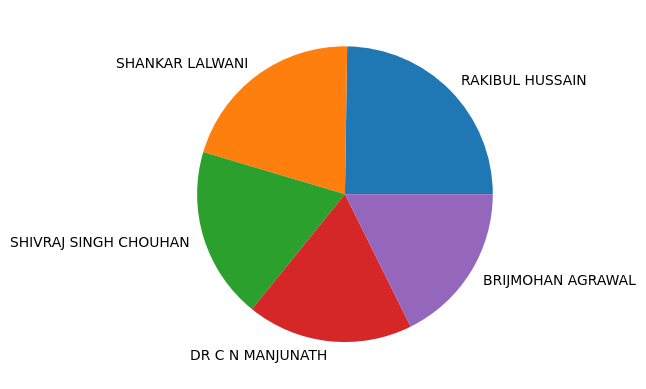

In [ ]:
# candidates = set(df["Candidate"])
# candidates_votes = {key: 0 for key in candidates}
# for key in candidates_votes:
#     candidates_votes[key] = int(
#         df[df["Candidate"] == key]["Total Votes"].iloc[0])
# candidates_votes = list(candidates_votes.items())
# candidates_votes.sort(key=lambda ele: ele[1], reverse=False)
# most = candidates_votes[-5:].copy()
# values = [x[1] for x in most]
# my_labels = [x[0]for x in most]
# y = np.array(values)
# plt.pie(y, labels=my_labels, autopct="%1.1f%%")
# plt.show()

top_vote_candidates=df.loc[:,["Candidate","Total Votes"]]
top_vote_candidates["Total Votes"]=top_vote_candidates["Total Votes"].astype("float64")
top_vote_candidates=top_vote_candidates.sort_values(by='Total Votes',ascending=False)
values=np.array(top_vote_candidates["Total Votes"][:5])
mylabels=np.array(top_vote_candidates["Candidate"][:5])
plt.pie(values,labels=mylabels)
plt.show()

Make a bar graph to see the postal votes received by the parties in Karnataka

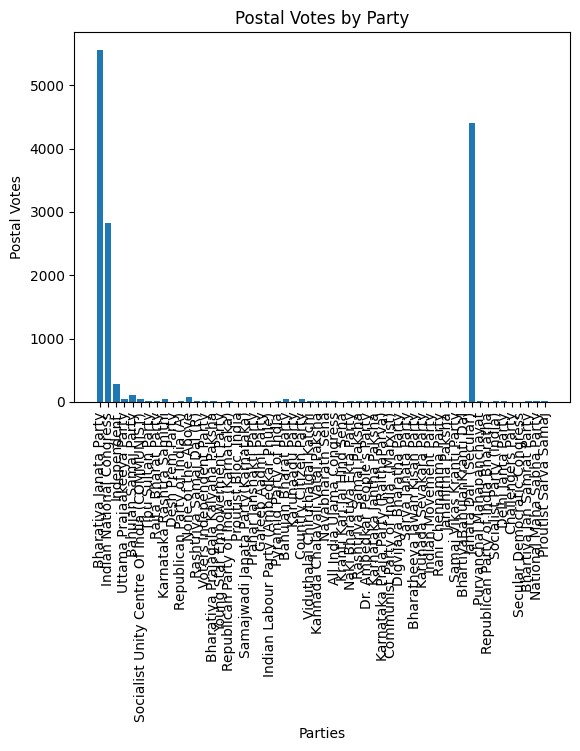

In [ ]:
# kparties = set(df[df["State"] == "Karnataka"]["Party"])
# kparties_postal = {key: 0 for key in kparties}
# keyrem = []
# for key in kparties_postal:
#     t = df[(df["State"] == "Karnataka") & (
#         df["Party"] == key)]["Postal Votes"].iloc[0]
#     if (t == '-' or t == '0'):
#         keyrem.append(key)
#     else:
#         kparties_postal[key] = int(t)
# for key in keyrem:
#     kparties_postal.pop(key)
# kparties_postal = list(kparties_postal.items())

# values = [x[1] for x in kparties_postal]
# my_labels = [x[0] for x in kparties_postal]
kparties=df[df["State"]=="Karnataka"]
kparties=kparties[["Party","Postal Votes"]]
kparties.drop(kparties[kparties["Postal Votes"]=='-'].index,inplace=True)
kparties["Postal Votes"]=pd.to_numeric(kparties["Postal Votes"])
values=kparties["Postal Votes"]
mylabels=kparties["Party"]
x = np.array(mylabels)
y = np.array(values)
plt.bar(x, y)
plt.xlabel('Parties')
plt.ylabel('Postal Votes')
plt.title('Postal Votes by Party')
plt.xticks(rotation=90)
plt.show()


### Congratulations on making it to the end. EDA is a very vital toolkit to tackle Machine Learning problems. Hopefully this task helped you understand concepts of data analysis and visualisation. See you at the interviews :)

For any doubts contact:

Taran Shah: +91 9619223242

Divyam Jain: +91 96193 77044